In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
from scipy.stats import chi2_contingency

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("train_values.csv")
label = pd.read_csv("train_labels.csv")

In [6]:
data["grade"] = label["damage_grade"]

#### General Overview

In [7]:
data.shape

(260601, 40)

In [8]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [9]:
data.isnull().sum().sort_values(ascending=False)

grade                                     0
has_secondary_use_other                   0
has_superstructure_stone_flag             0
has_superstructure_mud_mortar_stone       0
has_superstructure_adobe_mud              0
plan_configuration                        0
position                                  0
other_floor_type                          0
ground_floor_type                         0
roof_type                                 0
foundation_type                           0
land_surface_condition                    0
height_percentage                         0
area_percentage                           0
age                                       0
count_floors_pre_eq                       0
geo_level_3_id                            0
geo_level_2_id                            0
geo_level_1_id                            0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_secondary_use_hotel         

### Damage Grade
1 represents low damage<br/>
2 represents a medium amount of damage<br/>
3 represents almost complete destruction


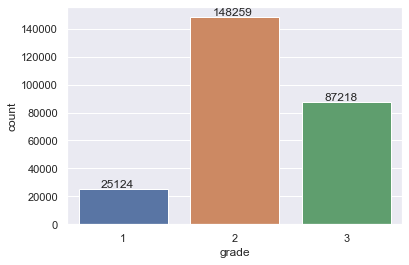

In [10]:
ax = sns.countplot(data["grade"])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

In [11]:
data["grade"].value_counts(normalize=True)

2    0.568912
3    0.334680
1    0.096408
Name: grade, dtype: float64

In [12]:
grade_1 = data[data["grade"] == 1]
grade_2 = data[data["grade"] == 2]
grade_3 = data[data["grade"] == 3]

### Geo level 1 id

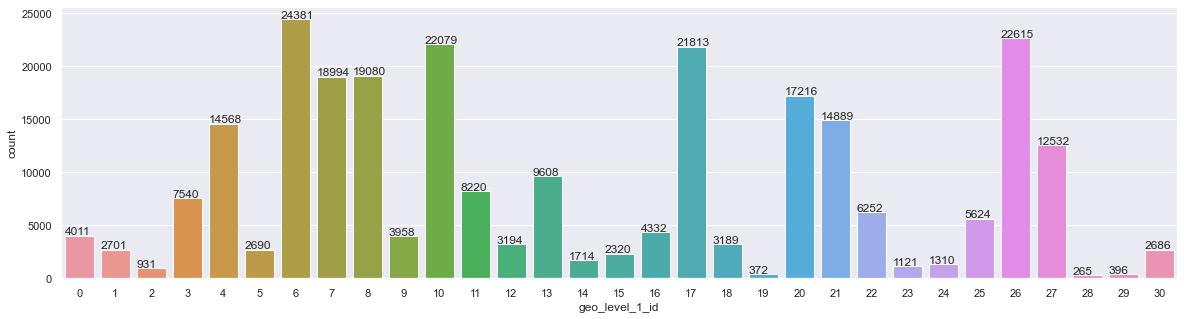

In [13]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(data["geo_level_1_id"])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()+100))

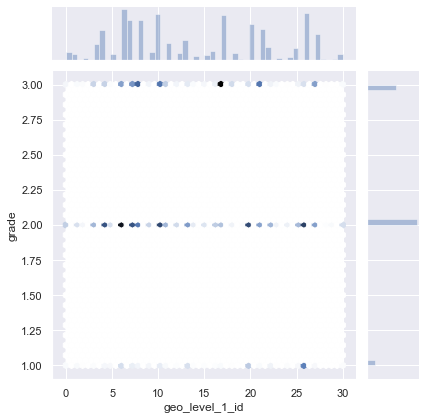

In [14]:
sns.jointplot(data["geo_level_1_id"], data["grade"], kind="hex")

In [15]:
grade_1["geo_level_1_id"].value_counts(normalize=True)[:5]

26    0.319535
20    0.131786
6     0.083904
13    0.078252
10    0.048201
Name: geo_level_1_id, dtype: float64

In [16]:
grade_2["geo_level_1_id"].value_counts(normalize=True)[:5]

6     0.109417
26    0.085290
10    0.081661
20    0.079995
7     0.076036
Name: geo_level_1_id, dtype: float64

In [17]:
grade_3["geo_level_1_id"].value_counts(normalize=True)[:5]

17    0.201965
8     0.113658
10    0.100449
21    0.099865
7     0.076681
Name: geo_level_1_id, dtype: float64

#### Geo Level 2 ID

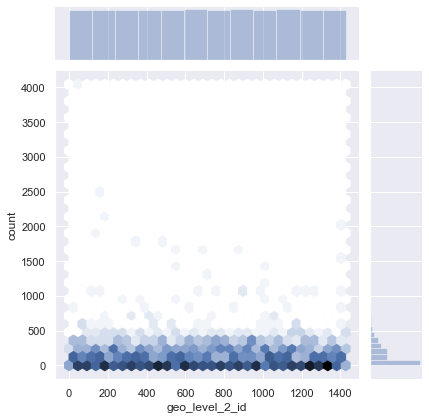

In [18]:
df = pd.DataFrame(data["geo_level_2_id"].value_counts()).reset_index()
df.columns = ["geo_level_2_id", "count"]

sns.jointplot(df["geo_level_2_id"], df["count"], kind="hex")

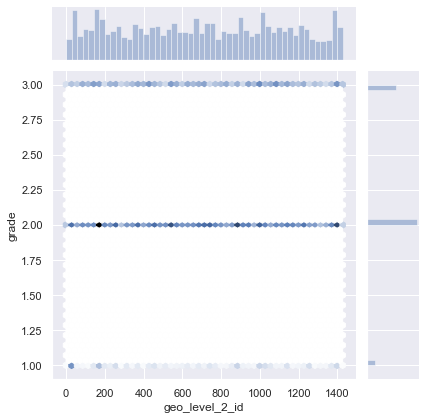

In [19]:
sns.jointplot(data["geo_level_2_id"], data["grade"], kind="hex")

In [20]:
grade_1["geo_level_2_id"].value_counts(normalize=True)[:5]

39      0.081555
1253    0.023484
886     0.021852
36      0.021414
158     0.021215
Name: geo_level_2_id, dtype: float64

In [21]:
grade_2["geo_level_2_id"].value_counts(normalize=True)[:5]

39      0.012337
158     0.011588
1387    0.009726
181     0.008957
673     0.008168
Name: geo_level_2_id, dtype: float64

In [22]:
grade_3["geo_level_2_id"].value_counts(normalize=True)[:5]

363     0.012131
533     0.011339
548     0.009046
1394    0.008496
1006    0.008301
Name: geo_level_2_id, dtype: float64

#### Geo Level 3 ID

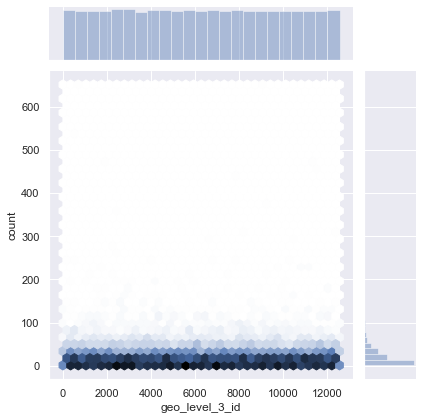

In [23]:
df = pd.DataFrame(data["geo_level_3_id"].value_counts()).reset_index()
df.columns = ["geo_level_3_id", "count"]

sns.jointplot(df["geo_level_3_id"], df["count"], kind="hex")

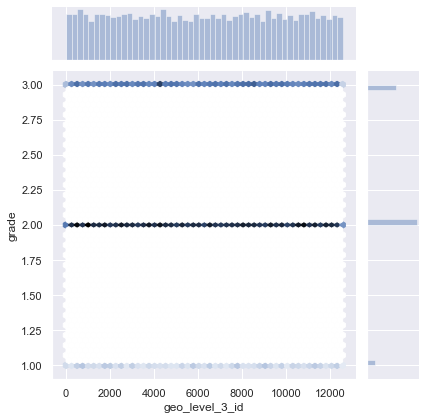

In [24]:
sns.jointplot(data["geo_level_3_id"], data["grade"], kind="hex")

#### count_floors_pre_eq (type: int)
number of floors in the building before the earthquake.

In [25]:
data["count_floors_pre_eq"].value_counts(normalize=True)

2    0.601007
3    0.213418
1    0.155184
4    0.020813
5    0.008619
6    0.000802
7    0.000150
9    0.000004
8    0.000004
Name: count_floors_pre_eq, dtype: float64

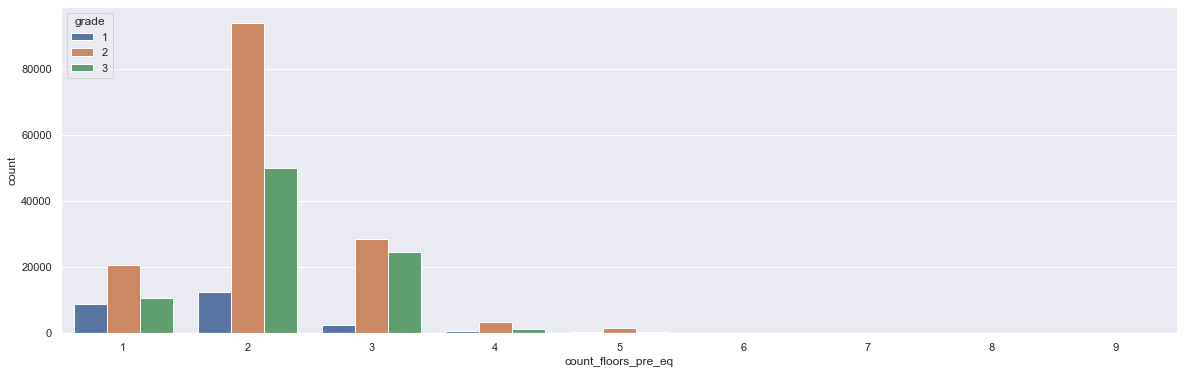

In [26]:
plt.figure(figsize=(20, 6))
sns.countplot(data["count_floors_pre_eq"], hue=data["grade"])

In [27]:
data.groupby("count_floors_pre_eq")["grade"].value_counts(normalize=True)

count_floors_pre_eq  grade
1                    2        0.514280
                     3        0.263940
                     1        0.221780
2                    2        0.599963
                     3        0.319634
                     1        0.080403
3                    2        0.512056
                     3        0.442329
                     1        0.045616
4                    2        0.622050
                     3        0.247603
                     1        0.130347
5                    2        0.659394
                     3        0.227516
                     1        0.113090
6                    2        0.636364
                     1        0.253589
                     3        0.110048
7                    2        0.641026
                     1        0.256410
                     3        0.102564
8                    2        1.000000
9                    1        1.000000
Name: grade, dtype: float64

### age (type: int)
age of the building in years.

In [28]:
data["age"].value_counts(normalize=True)

10     0.149255
15     0.138181
5      0.129305
20     0.123491
0      0.099927
25     0.093499
30     0.069179
35     0.041097
40     0.040518
50     0.027847
45     0.018077
60     0.013860
80     0.011723
55     0.007801
70     0.007579
995    0.005334
100    0.005234
65     0.004309
90     0.004163
85     0.003250
75     0.001965
95     0.001589
120    0.000691
150    0.000545
200    0.000407
110    0.000384
105    0.000342
125    0.000142
115    0.000081
140    0.000035
130    0.000035
180    0.000027
160    0.000023
170    0.000023
175    0.000019
135    0.000019
145    0.000012
190    0.000012
195    0.000008
165    0.000008
155    0.000004
185    0.000004
Name: age, dtype: float64

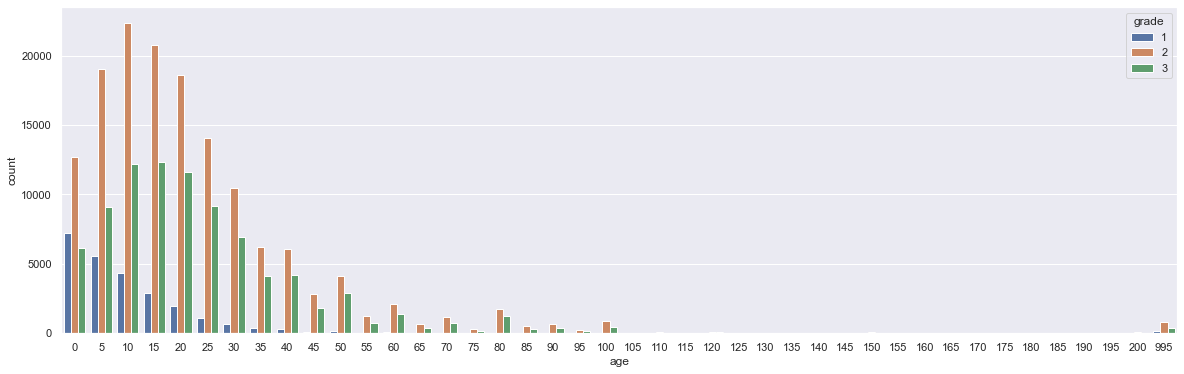

In [29]:
plt.figure(figsize=(20, 6))
sns.countplot(data["age"], hue=data["grade"])

In [30]:
data.groupby("age")["grade"].value_counts(normalize=True)

age  grade
0    2        0.488499
     1        0.276986
     3        0.234515
5    2        0.564739
     3        0.269371
                ...   
200  3        0.367925
     1        0.028302
995  2        0.591367
     3        0.279856
     1        0.128777
Name: grade, Length: 107, dtype: float64

### height_percentage (type: int)
normalized height of the building footprint.

In [31]:
data["height_percentage"].value_counts(normalize=True)

5     0.301277
6     0.178345
4     0.144907
7     0.136089
3     0.099604
8     0.053346
2     0.035706
9     0.020629
10    0.017237
11    0.003519
12    0.003480
13    0.002912
15    0.001120
16    0.000687
32    0.000288
18    0.000272
14    0.000253
20    0.000127
21    0.000050
23    0.000042
17    0.000035
19    0.000027
24    0.000015
25    0.000012
26    0.000008
28    0.000008
31    0.000004
Name: height_percentage, dtype: float64

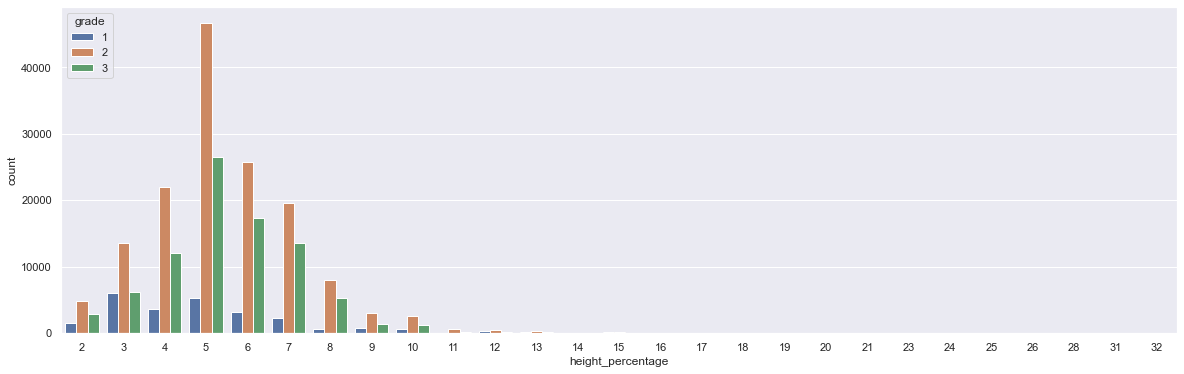

In [32]:
plt.figure(figsize=(20, 6))
sns.countplot(data["height_percentage"], hue=data["grade"])

### land_surface_condition (type: categorical)
surface condition of the land where the building was built. Possible values: n, o, t.

In [33]:
data["land_surface_condition"].value_counts(normalize=True)

t    0.831758
n    0.136331
o    0.031911
Name: land_surface_condition, dtype: float64

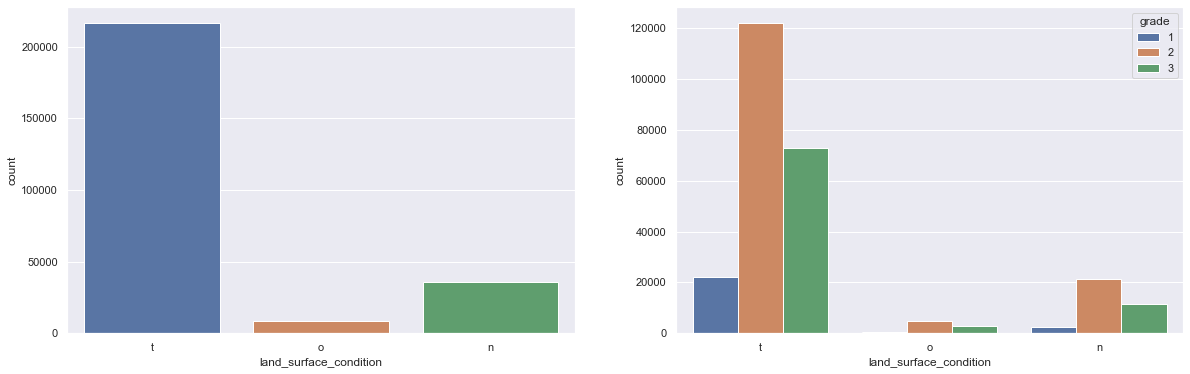

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["land_surface_condition"], ax=ax[0])
sns.countplot(data["land_surface_condition"], hue=data["grade"], ax=ax[1])

In [35]:
data.groupby("land_surface_condition")["grade"].value_counts(normalize=True)

land_surface_condition  grade
n                       2        0.604706
                        3        0.323351
                        1        0.071943
o                       2        0.566138
                        3        0.361472
                        1        0.072391
t                       2        0.563151
                        3        0.335509
                        1        0.101339
Name: grade, dtype: float64

In [36]:
data["grade"].value_counts(normalize=True)

2    0.568912
3    0.334680
1    0.096408
Name: grade, dtype: float64

### foundation_type (type: categorical)
type of foundation used while building. Possible values: h, i, r, u, w.

In [37]:
data["foundation_type"].value_counts(normalize=True)

r    0.841117
w    0.058012
u    0.054720
i    0.040595
h    0.005556
Name: foundation_type, dtype: float64

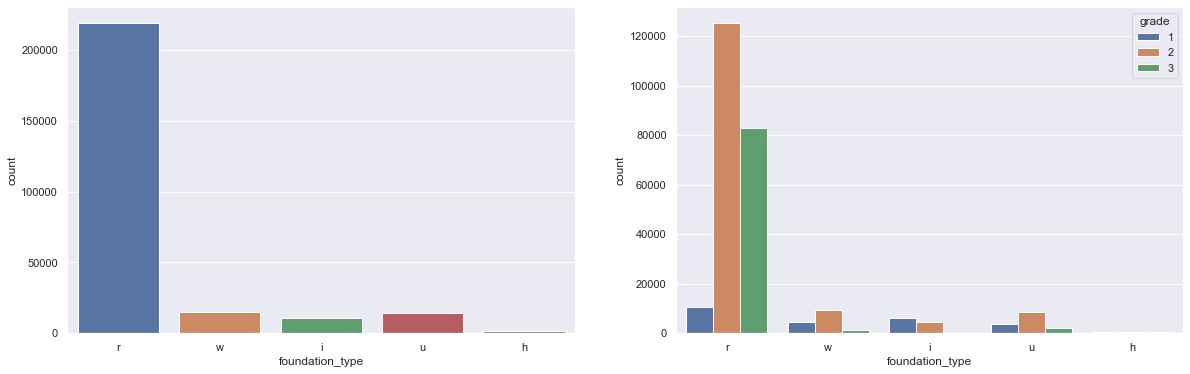

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["foundation_type"], ax=ax[0])
sns.countplot(data["foundation_type"], hue=data["grade"], ax=ax[1])

In [39]:
data.groupby("foundation_type")["grade"].value_counts(normalize=True)

foundation_type  grade
h                2        0.399862
                 3        0.352901
                 1        0.247238
i                1        0.567539
                 2        0.411570
                 3        0.020890
r                2        0.572615
                 3        0.378479
                 1        0.048906
u                2        0.598948
                 1        0.258696
                 3        0.142356
w                2        0.613176
                 1        0.287935
                 3        0.098889
Name: grade, dtype: float64

### roof_type (type: categorical)
type of roof used while building. Possible values: n, q, x.

In [40]:
data["roof_type"].value_counts(normalize=True)

n    0.701617
q    0.236285
x    0.062099
Name: roof_type, dtype: float64

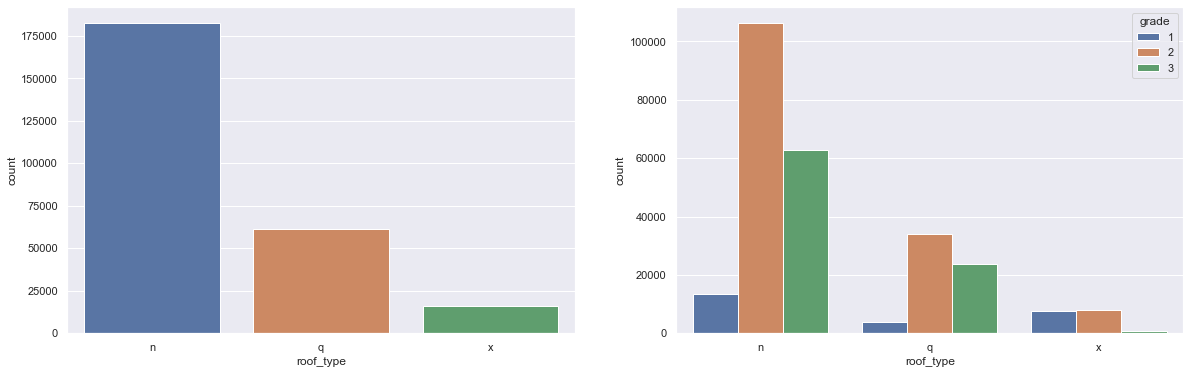

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["roof_type"], ax=ax[0])
sns.countplot(data["roof_type"], hue=data["grade"], ax=ax[1])

In [42]:
data.groupby("roof_type")["grade"].value_counts(normalize=True)

roof_type  grade
n          2        0.582180
           3        0.343728
           1        0.074091
q          2        0.552309
           3        0.383932
           1        0.063759
x          2        0.482173
           1        0.472780
           3        0.045047
Name: grade, dtype: float64

### ground_floor_type (type: categorical)
type of the ground floor. Possible values: f, m, v, x, z.

In [43]:
data["ground_floor_type"].value_counts(normalize=True)

f    0.804368
x    0.095460
v    0.094370
z    0.003853
m    0.001949
Name: ground_floor_type, dtype: float64

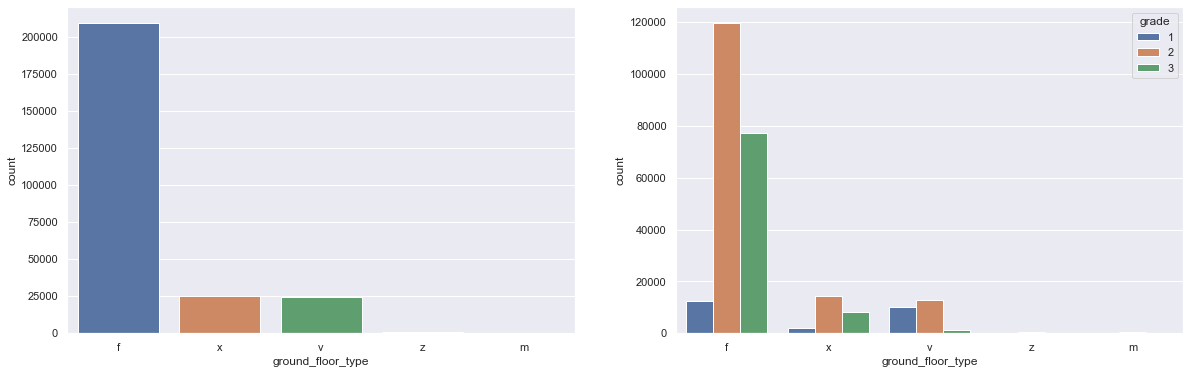

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["ground_floor_type"], ax=ax[0])
sns.countplot(data["ground_floor_type"], hue=data["grade"], ax=ax[1])

In [45]:
data.groupby("ground_floor_type")["grade"].value_counts(normalize=True)

ground_floor_type  grade
f                  2        0.571880
                   3        0.368612
                   1        0.059508
m                  2        0.675197
                   1        0.177165
                   3        0.147638
v                  2        0.527427
                   1        0.419184
                   3        0.053389
x                  2        0.584315
                   3        0.333199
                   1        0.082486
z                  2        0.529880
                   3        0.271912
                   1        0.198207
Name: grade, dtype: float64

### other_floor_type (type: categorical)
type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

In [46]:
data["other_floor_type"].value_counts(normalize=True)

q    0.634234
x    0.166722
j    0.152889
s    0.046155
Name: other_floor_type, dtype: float64

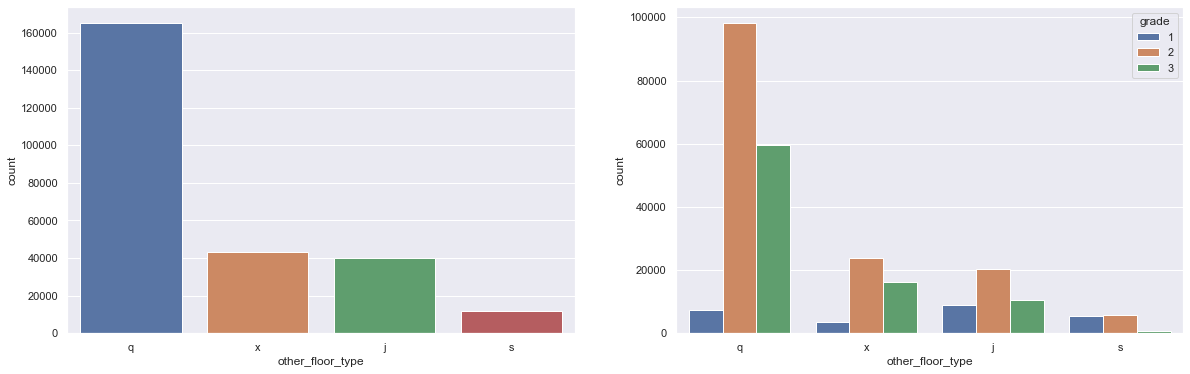

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["other_floor_type"], ax=ax[0])
sns.countplot(data["other_floor_type"], hue=data["grade"], ax=ax[1])

In [48]:
data.groupby("other_floor_type")["grade"].value_counts(normalize=True)

other_floor_type  grade
j                 2        0.511056
                  3        0.265919
                  1        0.223025
q                 2        0.594862
                  3        0.360445
                  1        0.044693
s                 2        0.490855
                  1        0.450865
                  3        0.058281
x                 2        0.544858
                  3        0.376243
                  1        0.078899
Name: grade, dtype: float64

### position (type: categorical)
position of the building. Possible values: j, o, s, t.

In [49]:
data["position"].value_counts(normalize=True)

s    0.775477
t    0.164604
j    0.050967
o    0.008952
Name: position, dtype: float64

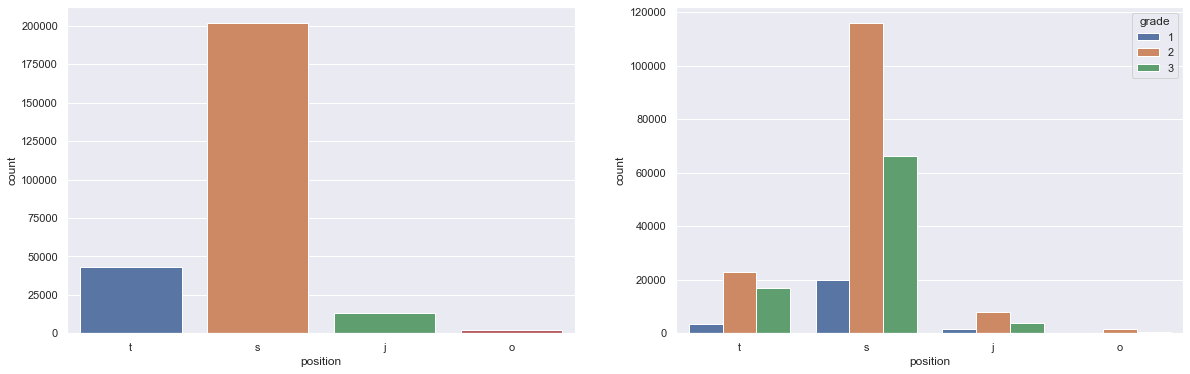

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["position"], ax=ax[0])
sns.countplot(data["position"], hue=data["grade"], ax=ax[1])

In [51]:
data.groupby("position")["grade"].value_counts(normalize=True)

position  grade
j         2        0.594715
          3        0.279175
          1        0.126111
o         2        0.689670
          3        0.258894
          1        0.051436
s         2        0.574254
          3        0.327438
          1        0.098308
t         2        0.529187
          3        0.390106
          1        0.080707
Name: grade, dtype: float64

### plan_configuration (type: categorical)
building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

In [52]:
data["plan_configuration"].value_counts(normalize=True)

d    0.959597
q    0.021842
u    0.014002
s    0.001328
c    0.001247
a    0.000967
o    0.000610
m    0.000177
n    0.000146
f    0.000084
Name: plan_configuration, dtype: float64

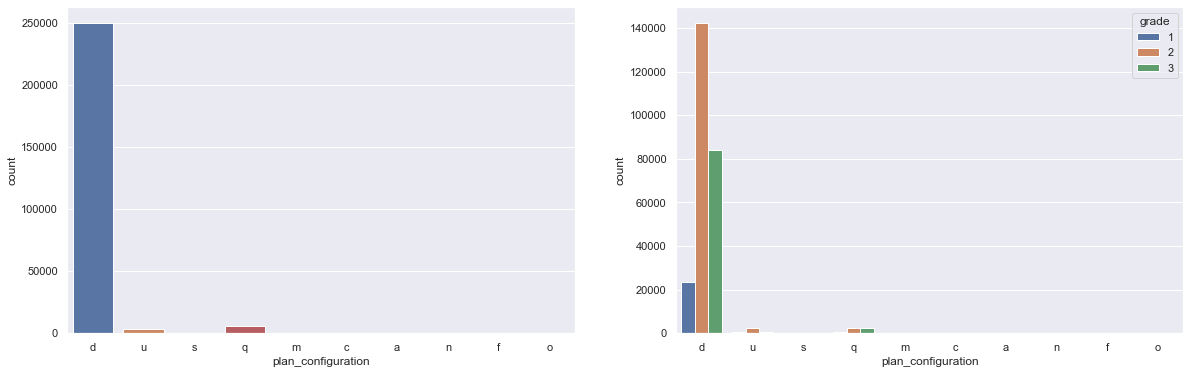

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["plan_configuration"], ax=ax[0])
sns.countplot(data["plan_configuration"], hue=data["grade"], ax=ax[1])

In [54]:
data.groupby("plan_configuration")["grade"].value_counts(normalize=True)

plan_configuration  grade
a                   2        0.623016
                    1        0.261905
                    3        0.115079
c                   2        0.633846
                    1        0.264615
                    3        0.101538
d                   2        0.569928
                    3        0.336859
                    1        0.093213
f                   2        0.727273
                    3        0.272727
m                   2        0.739130
                    1        0.173913
                    3        0.086957
n                   2        0.526316
                    3        0.315789
                    1        0.157895
o                   2        0.603774
                    1        0.251572
                    3        0.144654
q                   2        0.454146
                    3        0.408644
                    1        0.137210
s                   2        0.644509
                    3        0.202312
                    1   

### has_superstructure_adobe_mud (type: binary)
flag variable that indicates if the superstructure was made of Adobe/Mud.

In [55]:
data["has_superstructure_adobe_mud"].value_counts(normalize=True)

0    0.911355
1    0.088645
Name: has_superstructure_adobe_mud, dtype: float64

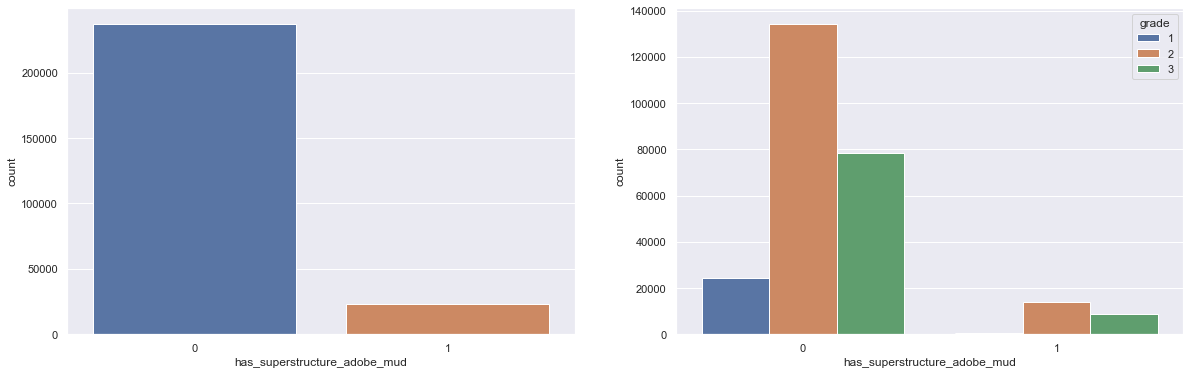

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_adobe_mud"], ax=ax[0])
sns.countplot(data["has_superstructure_adobe_mud"], hue=data["grade"], ax=ax[1])

In [57]:
data.groupby("has_superstructure_adobe_mud")["grade"].value_counts(normalize=True)

has_superstructure_adobe_mud  grade
0                             2        0.565714
                              3        0.331002
                              1        0.103284
1                             2        0.601792
                              3        0.372495
                              1        0.025713
Name: grade, dtype: float64

### has_superstructure_mud_mortar_stone (type: binary)
flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

In [58]:
data["has_superstructure_mud_mortar_stone"].value_counts(normalize=True)

1    0.761935
0    0.238065
Name: has_superstructure_mud_mortar_stone, dtype: float64

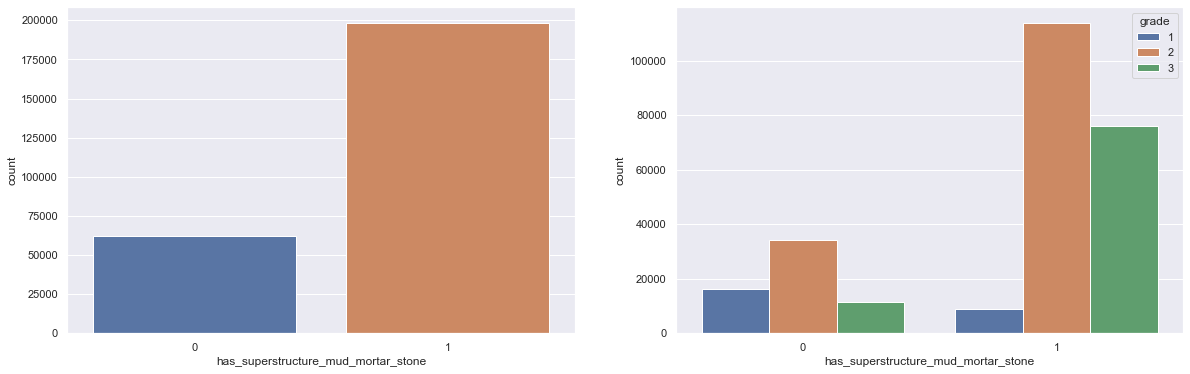

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_mud_mortar_stone"], ax=ax[0])
sns.countplot(data["has_superstructure_mud_mortar_stone"], hue=data["grade"], ax=ax[1])

In [60]:
data.groupby("has_superstructure_mud_mortar_stone")["grade"].value_counts(normalize=True)

has_superstructure_mud_mortar_stone  grade
0                                    2        0.553063
                                     1        0.263765
                                     3        0.183172
1                                    2        0.573864
                                     3        0.382019
                                     1        0.044117
Name: grade, dtype: float64

### has_superstructure_stone_flag (type: binary)
flag variable that indicates if the superstructure was made of Stone

In [61]:
data["has_superstructure_stone_flag"].value_counts(normalize=True)

0    0.965668
1    0.034332
Name: has_superstructure_stone_flag, dtype: float64

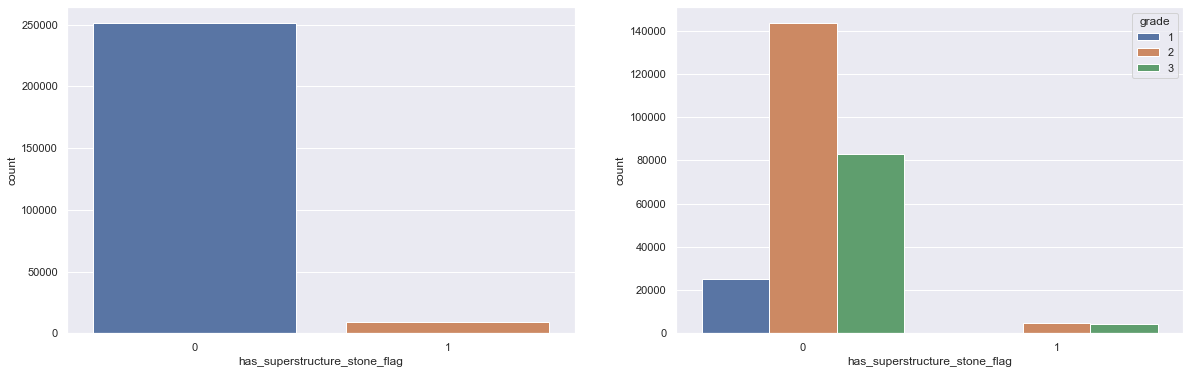

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_stone_flag"], ax=ax[0])
sns.countplot(data["has_superstructure_stone_flag"], hue=data["grade"], ax=ax[1])

In [63]:
data.groupby("has_superstructure_stone_flag")["grade"].value_counts(normalize=True)

has_superstructure_stone_flag  grade
0                              2        0.571121
                               3        0.329766
                               1        0.099112
1                              2        0.506762
                               3        0.472896
                               1        0.020342
Name: grade, dtype: float64

### has_superstructure_cement_mortar_stone (type: binary)
flag variable that indicates if the superstructure was made of Cement Mortar - Stone

In [64]:
data["has_superstructure_cement_mortar_stone"].value_counts(normalize=True)

0    0.981765
1    0.018235
Name: has_superstructure_cement_mortar_stone, dtype: float64

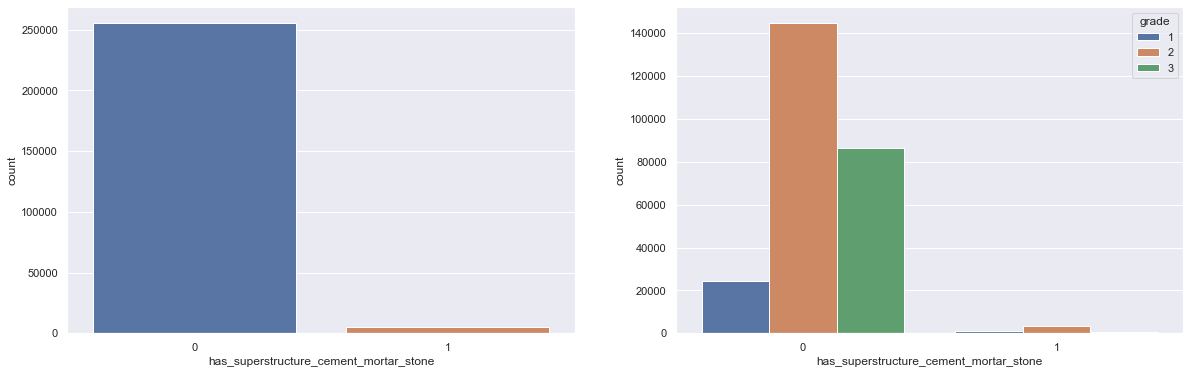

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_cement_mortar_stone"], ax=ax[0])
sns.countplot(data["has_superstructure_cement_mortar_stone"], hue=data["grade"], ax=ax[1])

In [66]:
data.groupby("has_superstructure_cement_mortar_stone")["grade"].value_counts(normalize=True)

has_superstructure_cement_mortar_stone  grade
0                                       2        0.566784
                                        3        0.338258
                                        1        0.094958
1                                       2        0.683502
                                        1        0.174453
                                        3        0.142045
Name: grade, dtype: float64

### has_superstructure_mud_mortar_brick (type: binary)
flag variable that indicates if the superstructure was made of Mud Mortar - Brick

In [67]:
data["has_superstructure_mud_mortar_brick"].value_counts(normalize=True)

0    0.931846
1    0.068154
Name: has_superstructure_mud_mortar_brick, dtype: float64

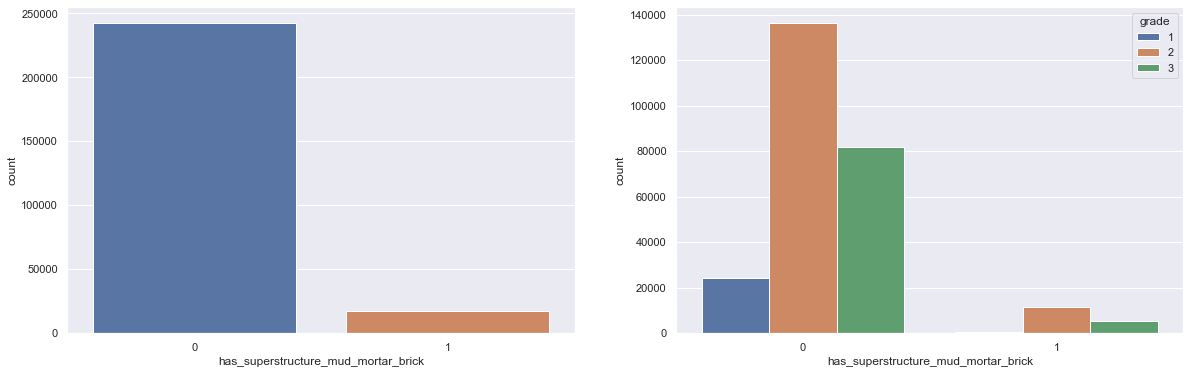

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_mud_mortar_brick"], ax=ax[0])
sns.countplot(data["has_superstructure_mud_mortar_brick"], hue=data["grade"], ax=ax[1])

In [69]:
data.groupby("has_superstructure_mud_mortar_brick")["grade"].value_counts(normalize=True)

has_superstructure_mud_mortar_brick  grade
0                                    2        0.562350
                                     3        0.336757
                                     1        0.100894
1                                    2        0.658634
                                     3        0.306289
                                     1        0.035077
Name: grade, dtype: float64

### has_superstructure_cement_mortar_brick (type: binary)
flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

In [70]:
data["has_superstructure_cement_mortar_brick"].value_counts(normalize=True)

0    0.924732
1    0.075268
Name: has_superstructure_cement_mortar_brick, dtype: float64

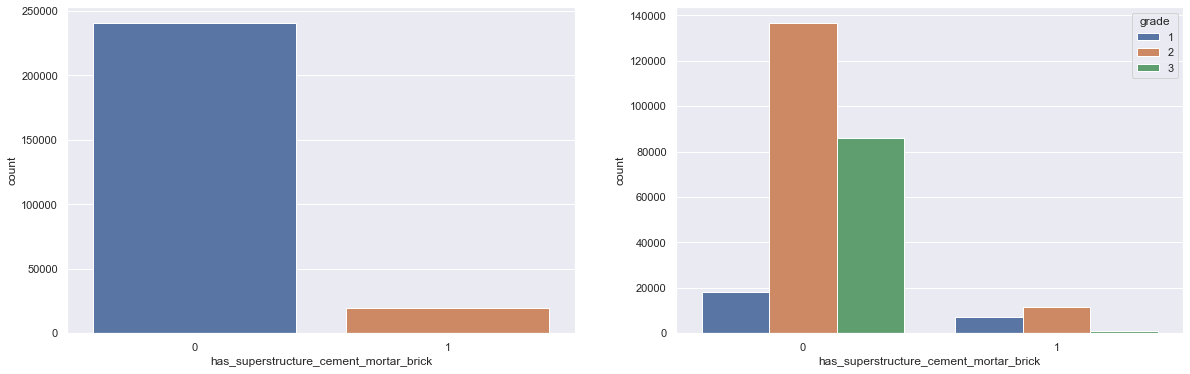

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_cement_mortar_brick"], ax=ax[0])
sns.countplot(data["has_superstructure_cement_mortar_brick"], hue=data["grade"], ax=ax[1])

In [72]:
data.groupby("has_superstructure_cement_mortar_brick")["grade"].value_counts(normalize=True)

has_superstructure_cement_mortar_brick  grade
0                                       2        0.567826
                                        3        0.357403
                                        1        0.074772
1                                       2        0.582258
                                        1        0.362223
                                        3        0.055519
Name: grade, dtype: float64

### has_superstructure_timber (type: binary)
flag variable that indicates if the superstructure was made of Timber

In [73]:
data["has_superstructure_timber"].value_counts(normalize=True)

0    0.745012
1    0.254988
Name: has_superstructure_timber, dtype: float64

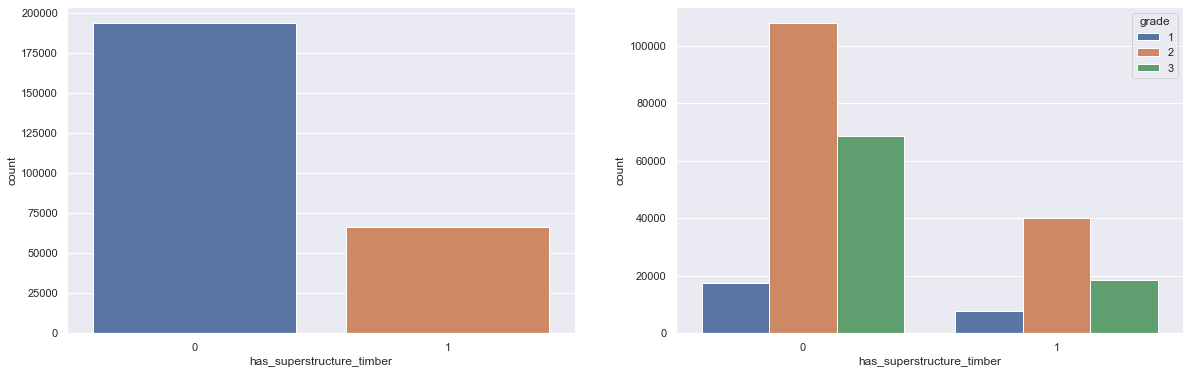

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_timber"], ax=ax[0])
sns.countplot(data["has_superstructure_timber"], hue=data["grade"], ax=ax[1])

In [75]:
data.groupby("has_superstructure_timber")["grade"].value_counts(normalize=True)

has_superstructure_timber  grade
0                          2        0.556639
                           3        0.353318
                           1        0.090043
1                          2        0.604771
                           3        0.280226
                           1        0.115004
Name: grade, dtype: float64

### has_superstructure_bamboo (type: binary)
flag variable that indicates if the superstructure was made of Bamboo.

In [76]:
data["has_superstructure_bamboo"].value_counts(normalize=True)

0    0.914989
1    0.085011
Name: has_superstructure_bamboo, dtype: float64

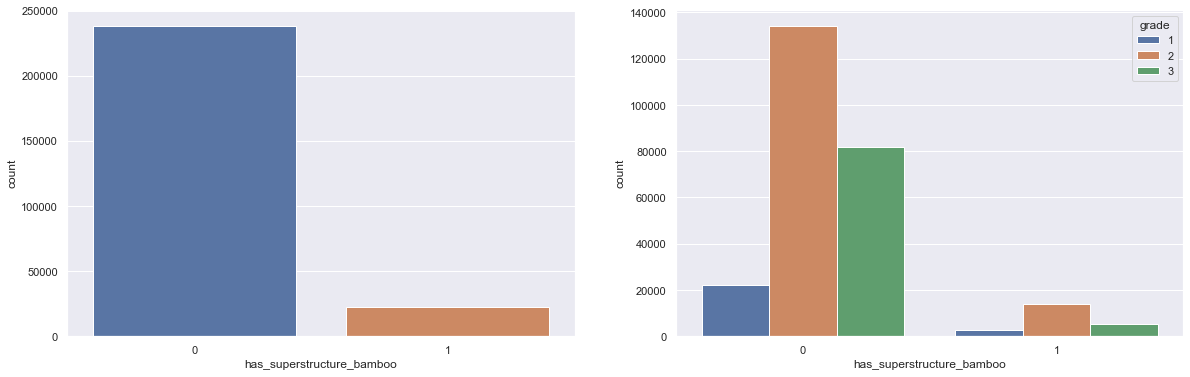

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_bamboo"], ax=ax[0])
sns.countplot(data["has_superstructure_bamboo"], hue=data["grade"], ax=ax[1])

In [78]:
data.groupby("has_superstructure_bamboo")["grade"].value_counts(normalize=True)

has_superstructure_bamboo  grade
0                          2        0.563052
                           3        0.343489
                           1        0.093459
1                          2        0.631985
                           3        0.239866
                           1        0.128148
Name: grade, dtype: float64

### has_superstructure_rc_non_engineered (type: binary)
flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

In [79]:
data["has_superstructure_rc_non_engineered"].value_counts(normalize=True)

0    0.95741
1    0.04259
Name: has_superstructure_rc_non_engineered, dtype: float64

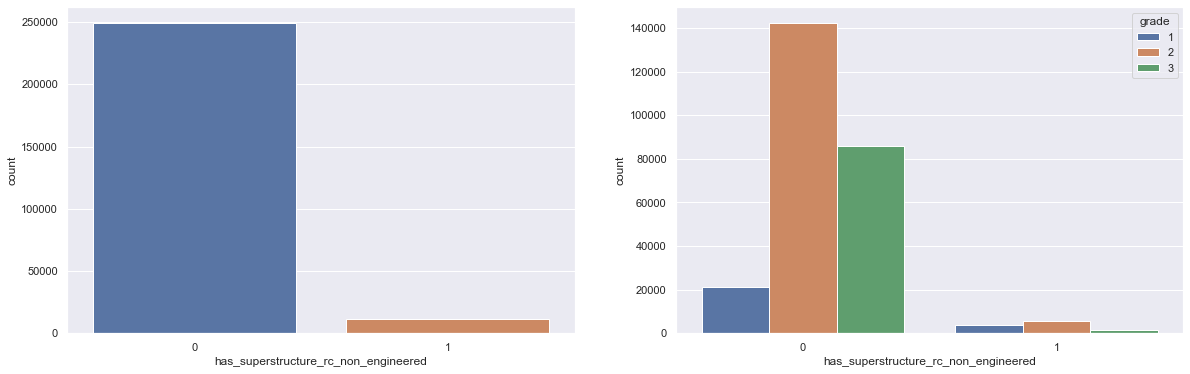

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_rc_non_engineered"], ax=ax[0])
sns.countplot(data["has_superstructure_rc_non_engineered"], hue=data["grade"], ax=ax[1])

In [81]:
data.groupby("has_superstructure_rc_non_engineered")["grade"].value_counts(normalize=True)

has_superstructure_rc_non_engineered  grade
0                                     2        0.570845
                                      3        0.343917
                                      1        0.085238
1                                     2        0.525453
                                      1        0.347509
                                      3        0.127038
Name: grade, dtype: float64

### has_superstructure_rc_engineered (type: binary)
flag variable that indicates if the superstructure was made of engineered reinforced concrete.

In [82]:
data["has_superstructure_rc_engineered"].value_counts(normalize=True)

0    0.984141
1    0.015859
Name: has_superstructure_rc_engineered, dtype: float64

### has_superstructure_other (type: binary)
flag variable that indicates if the superstructure was made of any other material

In [83]:
data["has_superstructure_other"].value_counts(normalize=True)

0    0.985015
1    0.014985
Name: has_superstructure_other, dtype: float64

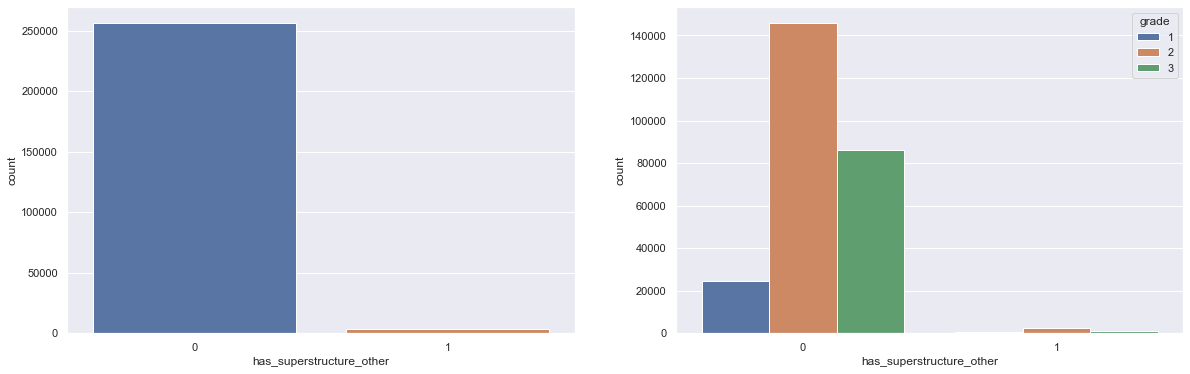

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_superstructure_other"], ax=ax[0])
sns.countplot(data["has_superstructure_other"], hue=data["grade"], ax=ax[1])

In [85]:
data.groupby("has_superstructure_other")["grade"].value_counts(normalize=True)

has_superstructure_other  grade
0                         2        0.568809
                          3        0.335872
                          1        0.095319
1                         2        0.575672
                          3        0.256338
                          1        0.167990
Name: grade, dtype: float64

### legal_ownership_status (type: categorical)
legal ownership status of the land where building was built. Possible values: a, r, v, w

In [86]:
data["legal_ownership_status"].value_counts(normalize=True)

v    0.962924
a    0.021151
w    0.010272
r    0.005652
Name: legal_ownership_status, dtype: float64

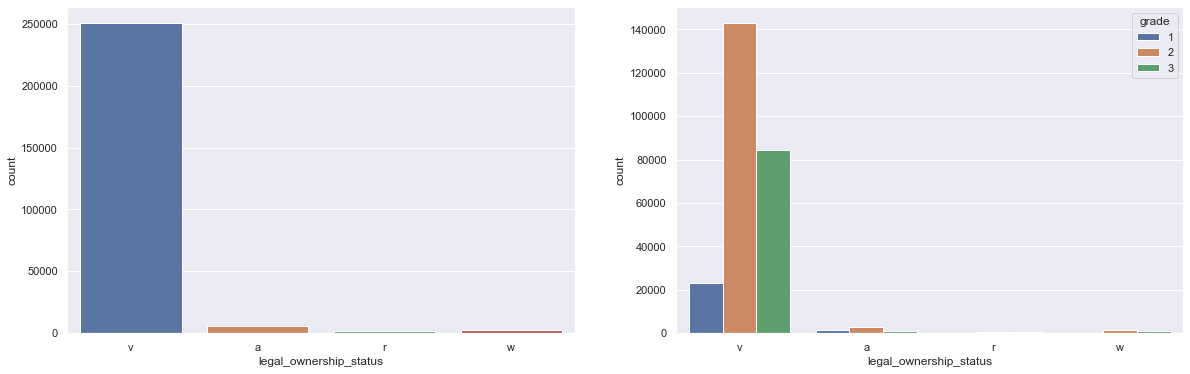

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["legal_ownership_status"], ax=ax[0])
sns.countplot(data["legal_ownership_status"], hue=data["grade"], ax=ax[1])

In [88]:
data.groupby("legal_ownership_status")["grade"].value_counts(normalize=True)

legal_ownership_status  grade
a                       2        0.557692
                        1        0.274129
                        3        0.168179
r                       2        0.493551
                        3        0.361847
                        1        0.144603
v                       2        0.570473
                        3        0.336795
                        1        0.092732
w                       2        0.487112
                        3        0.464326
                        1        0.048562
Name: grade, dtype: float64

### count_families (type: int)
number of families that live in the building.

In [89]:
data["count_families"].value_counts(normalize=True)

1    0.867667
0    0.080053
2    0.043338
3    0.006915
4    0.001493
5    0.000399
6    0.000084
7    0.000027
9    0.000015
8    0.000008
Name: count_families, dtype: float64

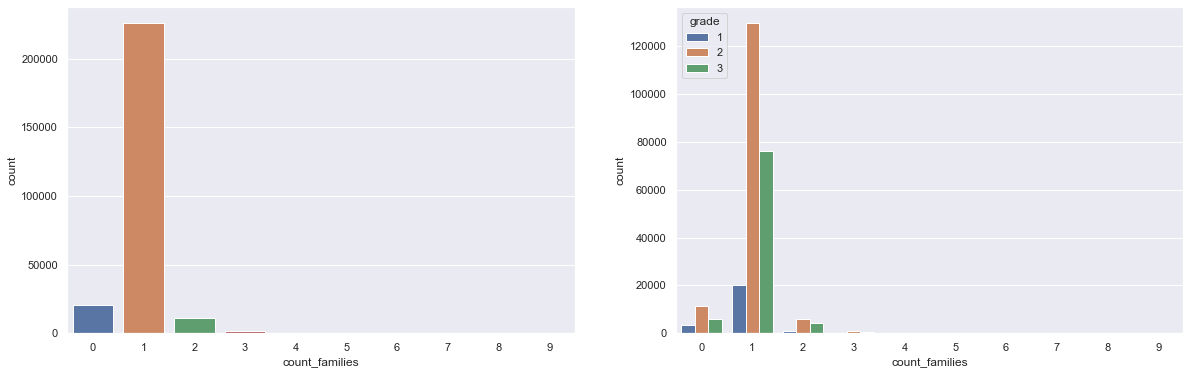

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["count_families"], ax=ax[0])
sns.countplot(data["count_families"], hue=data["grade"], ax=ax[1])

In [91]:
data.groupby("count_families")["grade"].value_counts(normalize=True)

count_families  grade
0               2        0.544579
                3        0.279839
                1        0.175582
1               2        0.573695
                3        0.336355
                1        0.089950
2               2        0.533115
                3        0.393483
                1        0.073402
3               2        0.491676
                3        0.385683
                1        0.122642
4               2        0.526992
                3        0.354756
                1        0.118252
5               2        0.490385
                3        0.346154
                1        0.163462
6               3        0.454545
                2        0.363636
                1        0.181818
7               1        0.428571
                2        0.285714
                3        0.285714
8               1        0.500000
                2        0.500000
9               2        0.750000
                1        0.250000
Name: grade, dtype: float6

### has_secondary_use (type: binary)
flag variable that indicates if the building was used for any secondary purpose.

In [92]:
data["has_secondary_use"].value_counts(normalize=True)

0    0.88812
1    0.11188
Name: has_secondary_use, dtype: float64

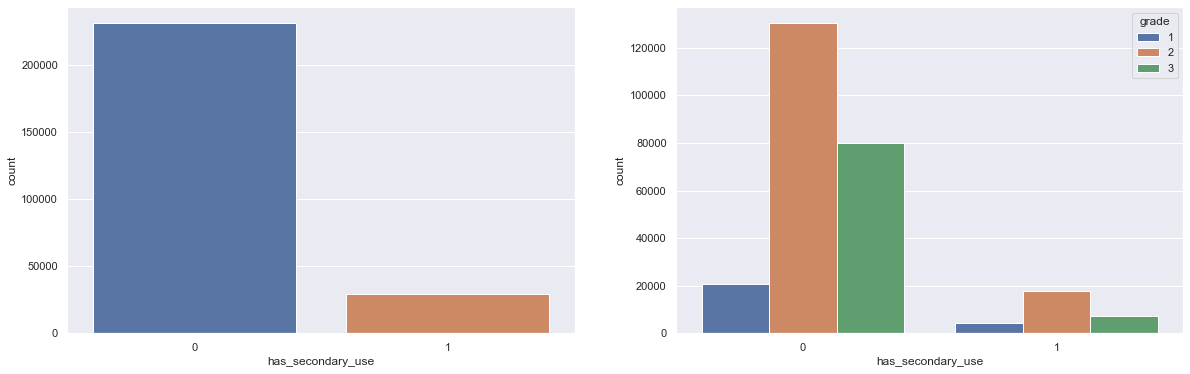

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use"], ax=ax[0])
sns.countplot(data["has_secondary_use"], hue=data["grade"], ax=ax[1])

In [94]:
data.groupby("has_secondary_use")["grade"].value_counts(normalize=True)

has_secondary_use  grade
0                  2        0.564039
                   3        0.345762
                   1        0.090199
1                  2        0.607594
                   3        0.246707
                   1        0.145699
Name: grade, dtype: float64

### has_secondary_use_agriculture (type: binary)
flag variable that indicates if the building was used for agricultural purposes

In [95]:
data["has_secondary_use_agriculture"].value_counts(normalize=True)

0    0.935622
1    0.064378
Name: has_secondary_use_agriculture, dtype: float64

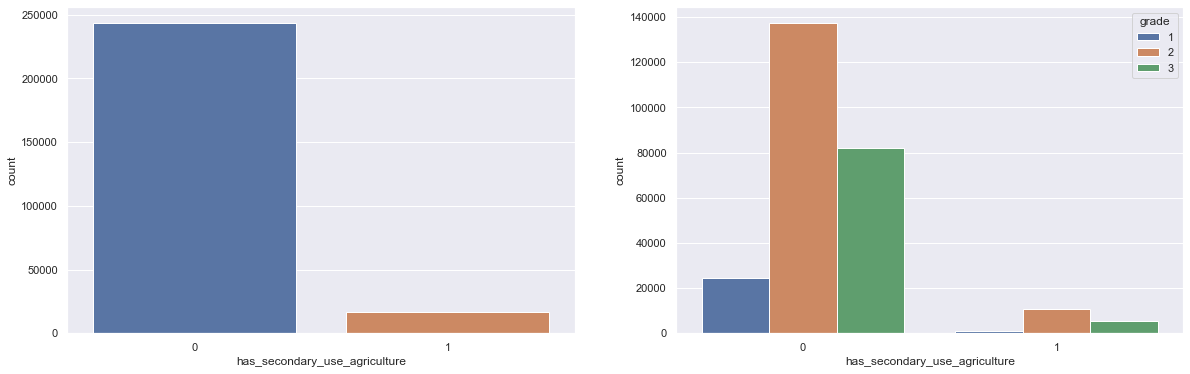

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_agriculture"], ax=ax[0])
sns.countplot(data["has_secondary_use_agriculture"], hue=data["grade"], ax=ax[1])

In [97]:
data.groupby("has_secondary_use_agriculture")["grade"].value_counts(normalize=True)

has_secondary_use_agriculture  grade
0                              2        0.564259
                               3        0.336099
                               1        0.099642
1                              2        0.636526
                               3        0.314061
                               1        0.049413
Name: grade, dtype: float64

### has_secondary_use_hotel (type: binary)
flag variable that indicates if the building was used as a hotel

In [98]:
data["has_secondary_use_hotel"].value_counts(normalize=True)

0    0.966374
1    0.033626
Name: has_secondary_use_hotel, dtype: float64

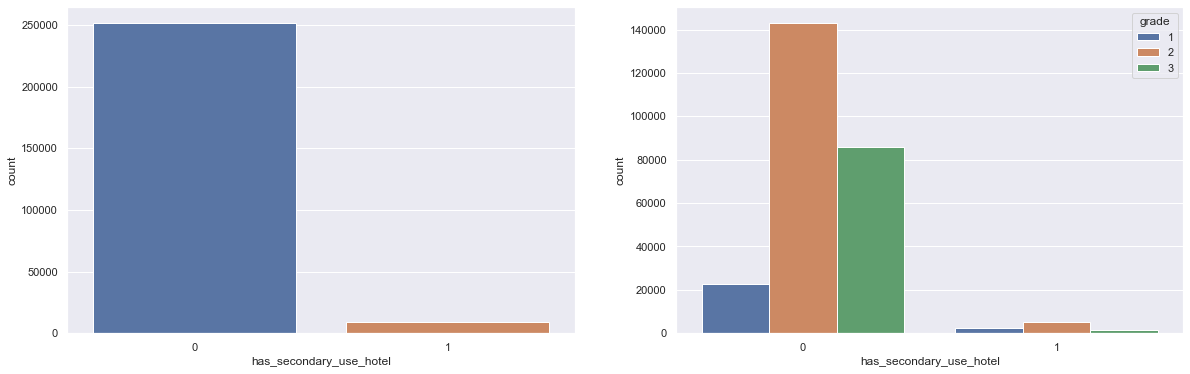

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_hotel"], ax=ax[0])
sns.countplot(data["has_secondary_use_hotel"], hue=data["grade"], ax=ax[1])

In [100]:
data.groupby("has_secondary_use_hotel")["grade"].value_counts(normalize=True)

has_secondary_use_hotel  grade
0                        2        0.568623
                         3        0.340413
                         1        0.090963
1                        2        0.577200
                         1        0.252881
                         3        0.169919
Name: grade, dtype: float64

### has_secondary_use_rental (type: binary)
flag variable that indicates if the building was used for rental purposes

In [101]:
data["has_secondary_use_rental"].value_counts(normalize=False)

0    258490
1      2111
Name: has_secondary_use_rental, dtype: int64

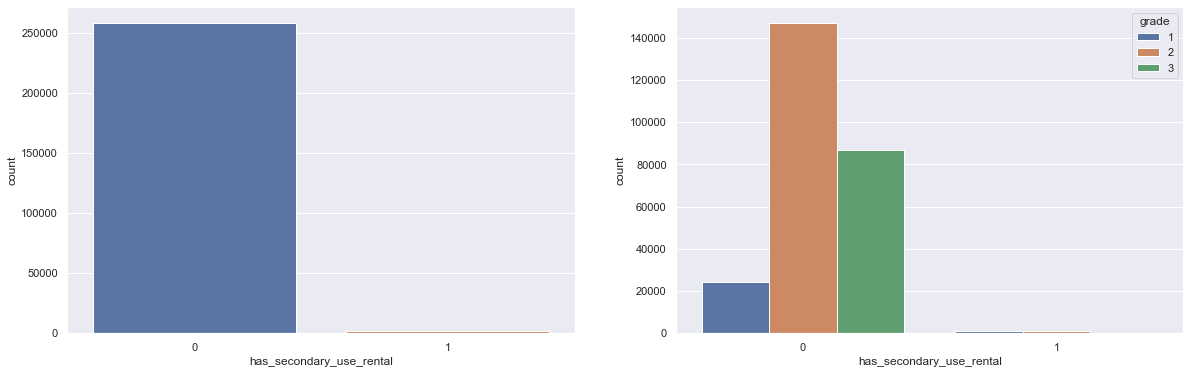

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_rental"], ax=ax[0])
sns.countplot(data["has_secondary_use_rental"], hue=data["grade"], ax=ax[1])

In [103]:
data.groupby("has_secondary_use_rental")["grade"].value_counts(normalize=True)

has_secondary_use_rental  grade
0                         2        0.569492
                          3        0.336705
                          1        0.093802
1                         2        0.497868
                          1        0.415443
                          3        0.086689
Name: grade, dtype: float64

### has_secondary_use_institution (type: binary)
flag variable that indicates if the building was used as a location of any institution

In [104]:
data["has_secondary_use_institution"].value_counts(normalize=True)

0    0.99906
1    0.00094
Name: has_secondary_use_institution, dtype: float64

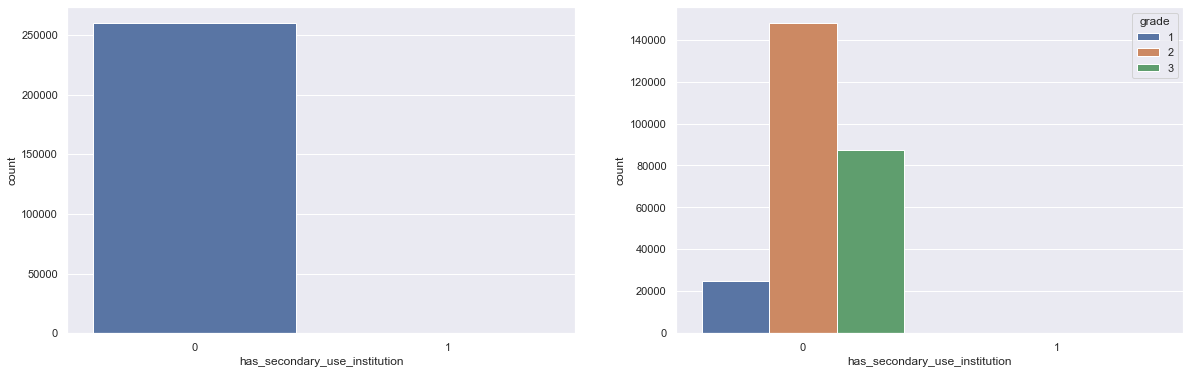

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_institution"], ax=ax[0])
sns.countplot(data["has_secondary_use_institution"], hue=data["grade"], ax=ax[1])

In [106]:
data.groupby("has_secondary_use_institution")["grade"].value_counts(normalize=True)

has_secondary_use_institution  grade
0                              2        0.568952
                               3        0.334930
                               1        0.096118
1                              2        0.526531
                               1        0.404082
                               3        0.069388
Name: grade, dtype: float64

### has_secondary_use_industry (type: binary)
flag variable that indicates if the building was used for industrial purposes

In [107]:
data["has_secondary_use_industry"].value_counts(normalize=True)

0    0.998929
1    0.001071
Name: has_secondary_use_industry, dtype: float64

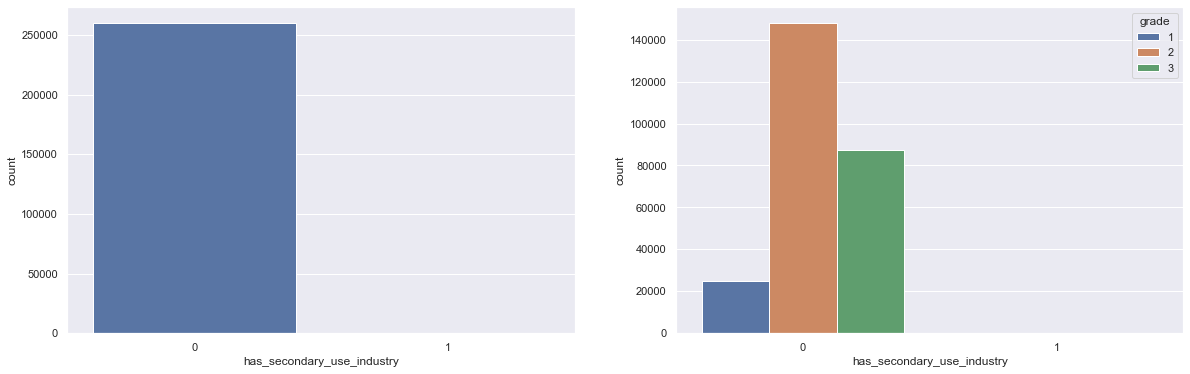

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_industry"], ax=ax[0])
sns.countplot(data["has_secondary_use_industry"], hue=data["grade"], ax=ax[1])

In [109]:
data.groupby("has_secondary_use_industry")["grade"].value_counts(normalize=True)

has_secondary_use_industry  grade
0                           2        0.568938
                            3        0.334778
                            1        0.096285
1                           2        0.544803
                            3        0.243728
                            1        0.211470
Name: grade, dtype: float64

### has_secondary_use_school (type: binary)
flag variable that indicates if the building was used as a school.

In [110]:
data["has_secondary_use_school"].value_counts(normalize=True)

0    0.999639
1    0.000361
Name: has_secondary_use_school, dtype: float64

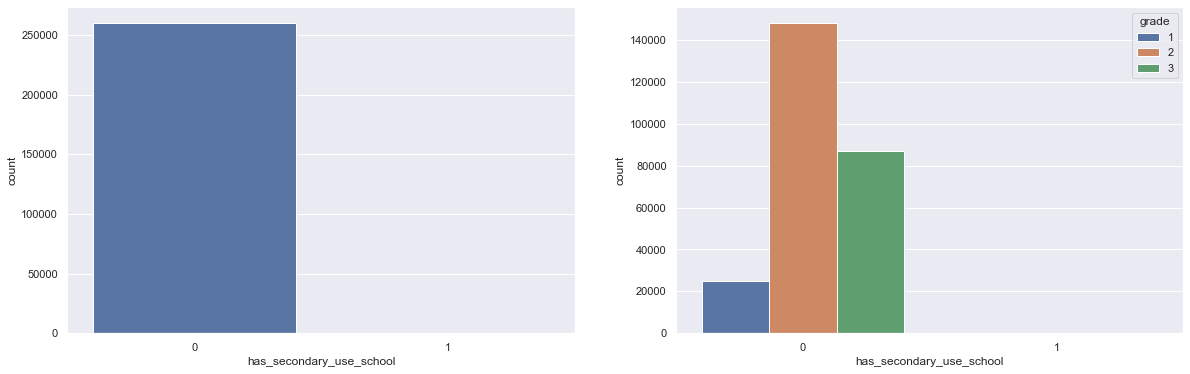

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_school"], ax=ax[0])
sns.countplot(data["has_secondary_use_school"], hue=data["grade"], ax=ax[1])

In [112]:
data.groupby("has_secondary_use_school")["grade"].value_counts(normalize=True)

has_secondary_use_school  grade
0                         2        0.568937
                          3        0.334736
                          1        0.096328
1                         2        0.500000
                          1        0.319149
                          3        0.180851
Name: grade, dtype: float64

### has_secondary_use_health_post (type: binary)
flag variable that indicates if the building was used as a health post

In [113]:
data["has_secondary_use_health_post"].value_counts(normalize=True)

0    0.999812
1    0.000188
Name: has_secondary_use_health_post, dtype: float64

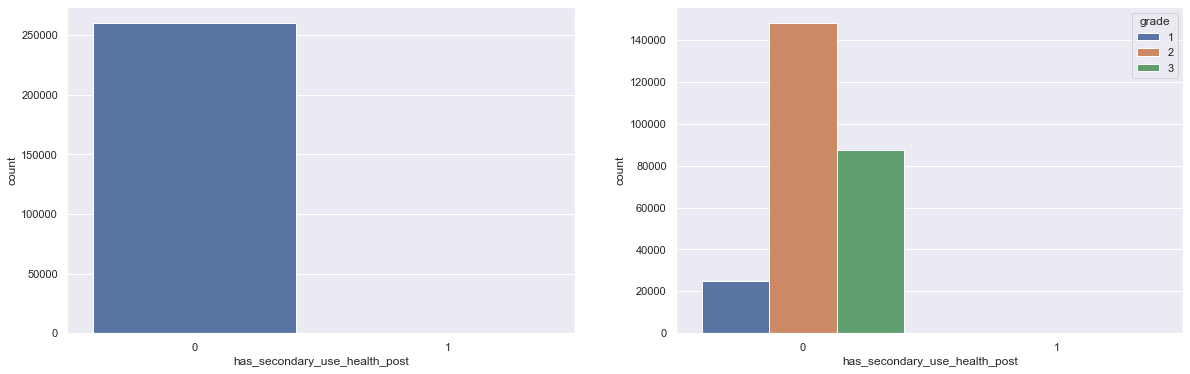

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_health_post"], ax=ax[0])
sns.countplot(data["has_secondary_use_health_post"], hue=data["grade"], ax=ax[1])

In [115]:
data.groupby("has_secondary_use_health_post")["grade"].value_counts(normalize=True)

has_secondary_use_health_post  grade
0                              2        0.568896
                               3        0.334724
                               1        0.096380
1                              2        0.653061
                               1        0.244898
                               3        0.102041
Name: grade, dtype: float64

### has_secondary_use_gov_office (type: binary)
flag variable that indicates if the building was used fas a government office

In [116]:
data["has_secondary_use_gov_office"].value_counts(normalize=True)

0    0.999854
1    0.000146
Name: has_secondary_use_gov_office, dtype: float64

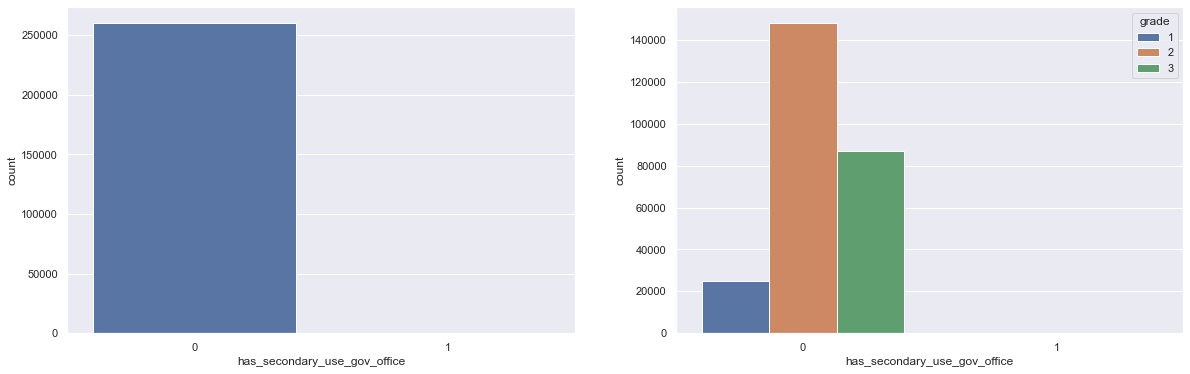

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_gov_office"], ax=ax[0])
sns.countplot(data["has_secondary_use_gov_office"], hue=data["grade"], ax=ax[1])

In [118]:
data.groupby("has_secondary_use_gov_office")["grade"].value_counts(normalize=True)

has_secondary_use_gov_office  grade
0                             2        0.568914
                              3        0.334714
                              1        0.096372
1                             2        0.552632
                              1        0.342105
                              3        0.105263
Name: grade, dtype: float64

### has_secondary_use_use_police (type: binary)
flag variable that indicates if the building was used as a police station

In [119]:
data["has_secondary_use_use_police"].value_counts(normalize=True)

0    0.999912
1    0.000088
Name: has_secondary_use_use_police, dtype: float64

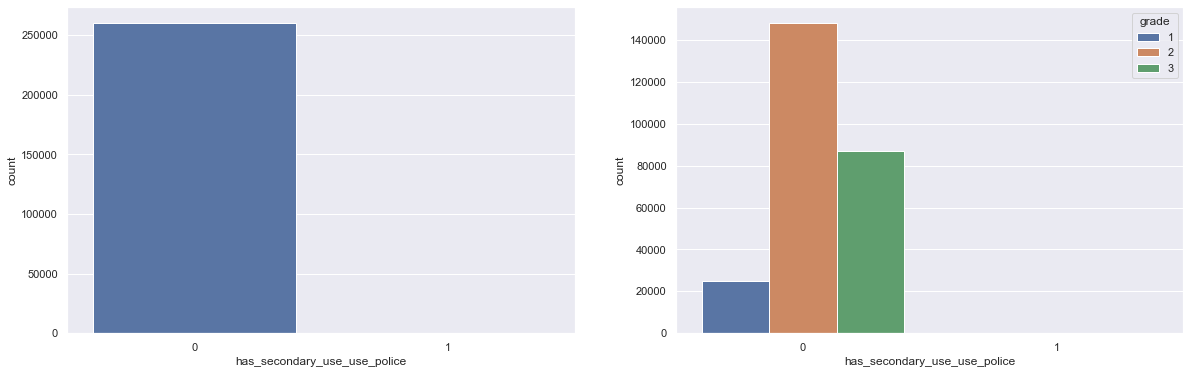

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_use_police"], ax=ax[0])
sns.countplot(data["has_secondary_use_use_police"], hue=data["grade"], ax=ax[1])

In [121]:
data.groupby("has_secondary_use_use_police")["grade"].value_counts(normalize=True)

has_secondary_use_use_police  grade
0                             2        0.568916
                              3        0.334683
                              1        0.096401
1                             2        0.521739
                              3        0.304348
                              1        0.173913
Name: grade, dtype: float64

### has_secondary_use_other (type: binary)
flag variable that indicates if the building was secondarily used for other purposes.

In [122]:
data["has_secondary_use_other"].value_counts(normalize=True)

0    0.994881
1    0.005119
Name: has_secondary_use_other, dtype: float64

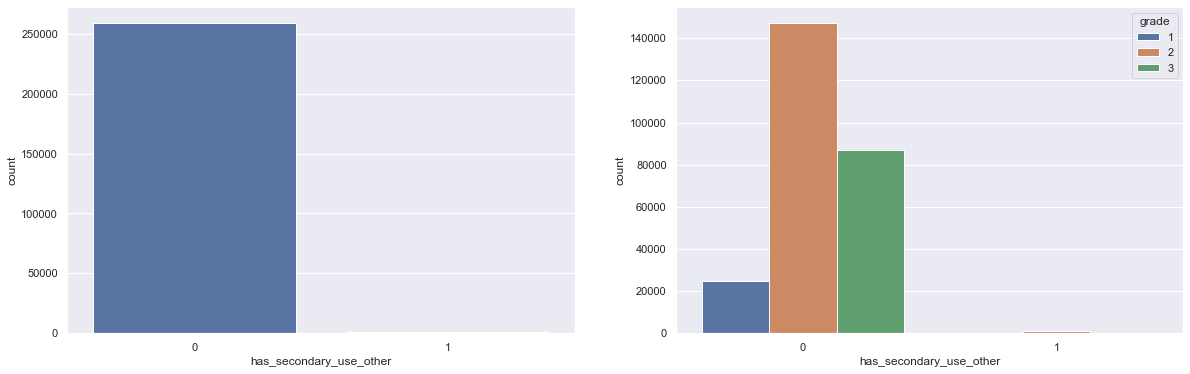

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["has_secondary_use_other"], ax=ax[0])
sns.countplot(data["has_secondary_use_other"], hue=data["grade"], ax=ax[1])

In [124]:
data.groupby("has_secondary_use_other")["grade"].value_counts(normalize=True)

has_secondary_use_other  grade
0                        2        0.568553
                         3        0.335218
                         1        0.096229
1                        2        0.638681
                         3        0.230135
                         1        0.131184
Name: grade, dtype: float64